In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split


In [2]:

xtrain_path = "./data/transformed_type1/xtrain.csv"
ytrain_path = "./data/transformed_type1/ytrain.csv"

X = pd.read_csv(xtrain_path, sep=',', header=None)
y = pd.read_csv(ytrain_path, sep=',', header=None)

X = X.to_numpy()
y = y.to_numpy()

# Assume that each row of `features` corresponds to the same row as `labels`.
assert X.shape[0] == y.shape[0]

n_features = X.shape[1]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)

print(f"X_train shape ={X_train.shape}")
print(f"X_val shape ={X_val.shape}")
print(f"y_train shape ={y_train.shape}")
print(f"y_val shape ={y_val.shape}")

X_train shape =(303, 70)
X_val shape =(34, 70)
y_train shape =(303, 1)
y_val shape =(34, 1)


In [3]:
n_epochs = 100
checkpoint_filepath = './models_type1_allpandas/checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath + 'best.h5', 
    save_weights_only=True, monitor='val_accuracy', verbose = 1, mode='max', save_best_only=True)

model_early_stop = EarlyStopping(monitor='val_accuracy', verbose =1, mode='max', patience=2)

hype_model = tf.keras.Sequential([
  layers.Dense(32, activation='relu', input_shape=(70,), kernel_initializer='glorot_uniform'),
  layers.Dropout(rate=0.5),  
  layers.Dense(1, activation='sigmoid')
])

hype_model.compile(loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'],
                      optimizer = tf.optimizers.Adam())

hype_model.summary()

history = hype_model.fit(X_train, y_train, epochs=n_epochs, callbacks=[model_checkpoint_callback, model_early_stop], 
                          validation_data=(X_val, y_val))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                2272      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.5842 - accuracy: 0.6875WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_end` time: 0.0010s). Check your callbacks.

Epoch 00001: val_accuracy improved from -inf to 0.73529, saving model to ./models_type1_allpandas\checkpointbest.h5


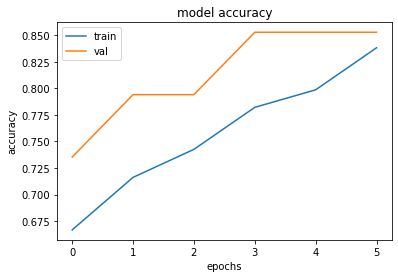

In [4]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [6]:
print(f"model accuracy on Train using all given features except 'APPL FIRST LANGUAGE DESC' = {hype_model.evaluate(X, y)[1]}")

11/11 [==============================] - 0s 998us/step - loss: 0.3403 - accuracy: 0.8546
model accuracy on Train using all given features except 'APPL FIRST LANGUAGE DESC' = 0.8545994162559509
